In [1]:
import time
from coffea import hist,  util
import coffea.processor as processor
import awkward as ak
import numpy as np
import glob as glob
import re
import itertools

from coffea.lumi_tools import LumiMask

import json

from coffea import hist

import pickle
import os


import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
from coffea.util import load, save


hists = load('/Users/hongjieun/MonoTop/notebook_plotting/check_events/onebyone/onebyone_2018_Run16.scaled') #

data_hists = hists['data']
bkg_hists = hists['bkg']
sig_hists = hists['sig']

In [55]:
#dat = ['META','METB','METC','METD']
dat = data_hists['cutflow'].identifiers('process')
reg = ['wmcr','tmcr',]
print(data_hists['cutflow'].identifiers('process'))
run = 9
for r in reg:
    tot = 0
    if r == 'wmcr': 
        final = run
        r_name = 'W(mu) CR'
    else: 
        final = run
        r_name = 'T(mu) CR'
    print('++ ', r_name, '++')
    for d in ['MET']:
        if d =='EGamma': continue
        print('-- ', d, '--')
        v1 = data_hists['cutflow'].integrate('process',d).integrate('region',r).values()[()][0]
        v2 = data_hists['cutflow'].integrate('process',d).integrate('region',r).values()[()][final]
        print('Total %-12s' % v1)
        print('Final %-12s' % v2)
        tot = tot + v2
        print()
        
    print('Dataset Total:', tot)    
    print()

[<StringBin (MET) instance at 0x7fd97ac63510>]
++  W(mu) CR ++
--  MET --
Total 29713483.0  
Final 76735.0     

Dataset Total: 76735.0

++  T(mu) CR ++
--  MET --
Total 29713483.0  
Final 76735.0     

Dataset Total: 76735.0



In [56]:
data_hists.keys()#[''].integrate('process',d).values()[()]

dict_keys(['template', 'sumw', 'j1pt', 'metphi', 'ele_pT', 'TvsQCD', 'recoil', 'cutflow', 'fj1pt', 'nphoton', 'eT_miss', 'mu_pT'])

In [57]:
for i in range(12):
    a = data_hists['cutflow'].integrate('process','MET').integrate('region','tmcr').values()[()][i]
    print('(',i,')',a)

( 0 ) 29713483.0
( 1 ) 22374795.0
( 2 ) 13794262.0
( 3 ) 13666128.0
( 4 ) 601357.0
( 5 ) 498260.0
( 6 ) 485774.0
( 7 ) 157784.0
( 8 ) 76802.0
( 9 ) 76735.0
( 10 ) 65281.0
( 11 ) 62151.0


<Hist (region,recoil) instance at 0x7fb984c5d6d0>


(0.1, 10000000)

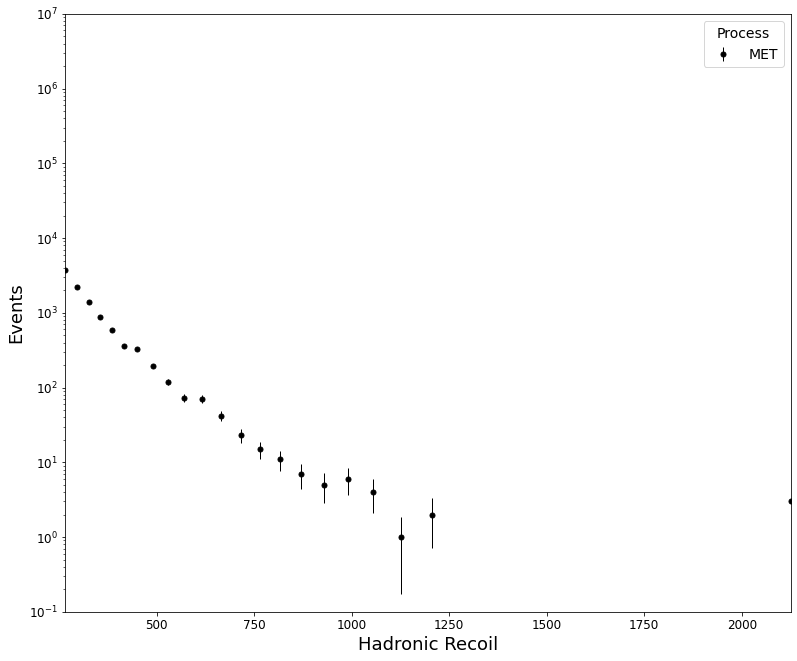

In [39]:
from coffea.hist import plot
vari = 'recoil'
region = 'tmcr'
plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
fig, ax = plt.subplots(figsize=(13,11))

data_err_opts = {'linestyle':'None', 'marker': '.', 'markersize': 10., 'color':'k'}#, 'elinewidth': 1, 'emarker': '_'}

print(data_hists[vari].integrate('process'))
#plot.plot1d(bkg_hists[vari].integrate('region',region), stack=True)
plot.plot1d(data_hists[vari].integrate('region',region),overlay="process",error_opts=data_err_opts)
ax.set_yscale('log')
ax.set_ylim(.1, 10000000)
#ax.set_xlim(0, 100)